# INPE Downloader - Climatology

This notebook shows the basic usage of the INPE Downloader - Climatology package.<br>
The `Climatology` module is intended to download the NETCDF files with Average and Accumulated past data<br>

The files are located at `ftp.cptec.inpe.br` (login: anonymous)

In [2]:
%load_ext autoreload
%autoreload 2

In [18]:
import xarray as xr
import pandas as pd
import geopandas as gpd
from pathlib import Path

import matplotlib.pyplot as plt

from rainreporter.reporter import RainReporter
from raindownloader.inpeparser import INPE, INPETypes, INPEParsers


## Get the Basins

In [19]:
shapes_mac = Path('/Users/cordmaur/Library/CloudStorage/OneDrive-AgênciaNacionaldeÁguas/Trabalho/SOE/COVEC/Bases/bacias de interesse SOE')
shapes_container = Path('/workspaces/bases/bacias de interesse SOE')

shapes = shapes_mac if shapes_mac.exists() else shapes_container
assert shapes.exists()

In [20]:
basins = {file.stem.split('_')[-1]: file for file in shapes.iterdir() if file.suffix == '.shp'}

In [21]:
basins

{'Doce': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Doce.shp'),
 'wgs84': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Doce_wgs84.shp'),
 'Itapecuru': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Itapecuru.shp'),
 'Jequitinhonha': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Jequitinhonha.shp'),
 'Madeira': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Madeira.shp'),
 'PortoVelho': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Madeira_em_PortoVelho.shp'),
 'Negro': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Negro.shp'),
 'Paraguai': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Paraguai.shp'),
 'ParaibaDoSul': PosixPath('/workspaces/bases/bacias de interesse SOE/bacias50k_ParaibaDoSul.shp'),
 'Parana': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Parana.shp'),
 'Pardo': PosixPath('/workspaces/bases/bacias de interesse SOE/bacia_Pardo.shp'),
 'Parnaiba': PosixPa

## Create the Reporter

In [22]:
reporter = RainReporter(
    server=INPE.FTPurl,
    parsers=INPEParsers.parsers,
    download_folder='../tmp',
    post_processors=INPEParsers.post_processors
)

In [32]:
cube = reporter.get_cube('2001-01', '2022-12', datatype=INPETypes.MONTHLY_ACCUM_YEARLY)
array = cube['pacum']

In [33]:
# basin = gpd.read_file('/workspaces/bases/Grande/')
basin = gpd.read_file('/workspaces/bases/Incre_Bacia Paraíba do Sul/')
# basin = gpd.read_file(basins['Francisco'])

/workspaces/INPERainDownloader/rainreporter/reporter.py:140: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


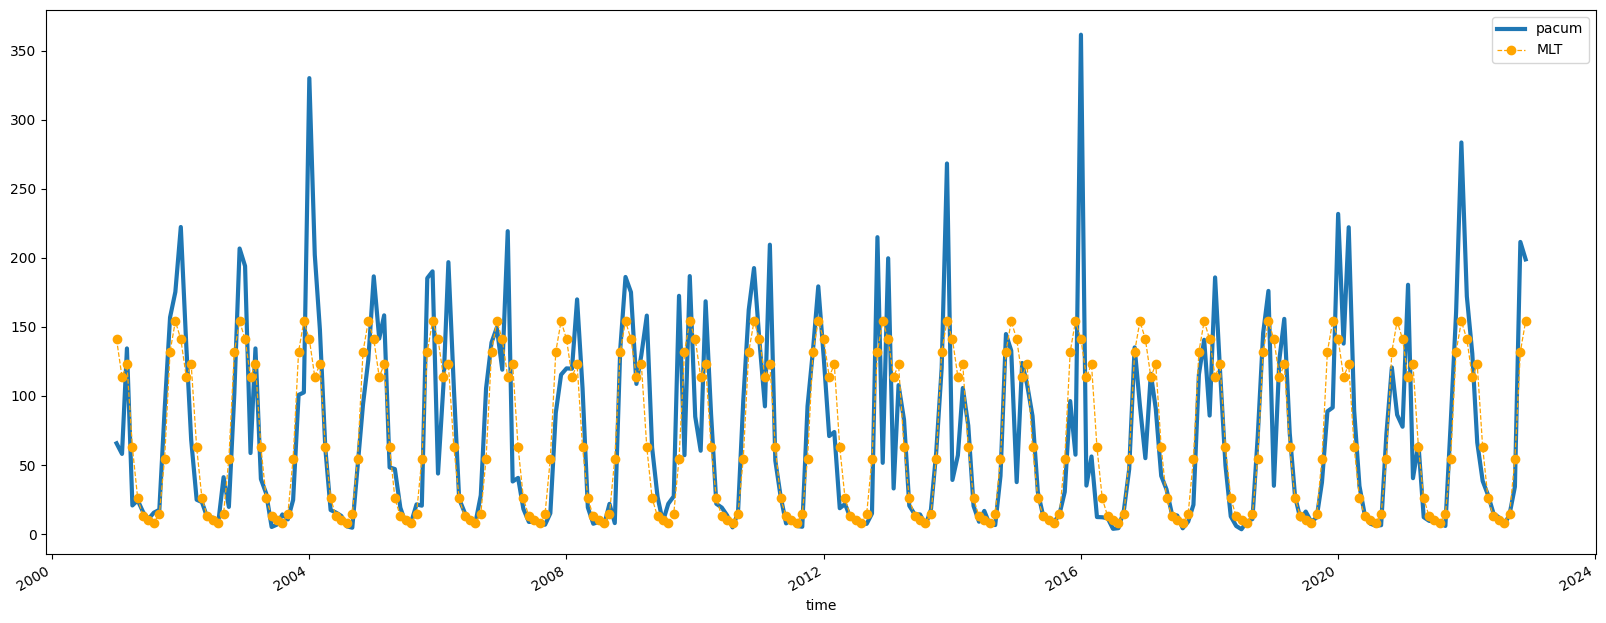

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))
mlt = RainReporter.plot_monthly_rain(plt_ax=ax, cube=array, shp=basin, linewidth=3)